# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "39394ea25014909e2c45b4210fe78d77f5440470"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [5]:
! wget -O bollinger_bands.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/bollinger_bands/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' bollinger_bands.py

--2024-01-13 23:13:30--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/bollinger_bands/_strategy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3632 (3.5K) [text/plain]
Saving to: ‘bollinger_bands.py’

bollinger_bands.py  100%[===================>]   3.55K  --.-KB/s    in 0s      

2024-01-13 23:13:31 (53.0 MB/s) - ‘bollinger_bands.py’ saved [3632/3632]



In [6]:
from bollinger_bands import BollingerBands as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': None,
 'strategyId': '8933340d212146118b753099855e6941'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('TATAMOTORS', exchange='NSE')
instrument

[{'id': 17, 'value': 'NSE:TATAMOTORS'},
 {'id': 1679162, 'value': 'NSE:TATAMOTORS.AF'},
 {'id': 1675517, 'value': 'NSE:TATAMOTORS.BL'},
 {'id': 1676316, 'value': 'NSE:TATAMOTORS.RL'},
 {'id': 40464, 'value': 'NSE:TATAMOTORS20DEC100CE'},
 {'id': 40465, 'value': 'NSE:TATAMOTORS20DEC100PE'},
 {'id': 40466, 'value': 'NSE:TATAMOTORS20DEC105CE'},
 {'id': 40467, 'value': 'NSE:TATAMOTORS20DEC105PE'},
 {'id': 40468, 'value': 'NSE:TATAMOTORS20DEC110CE'},
 {'id': 40469, 'value': 'NSE:TATAMOTORS20DEC110PE'}]

## Setup Parameters

In [10]:
parameters = {
  'TIME_PERIOD': 12,
  'STANDARD_DEVIATIONS': 2,
}

In [11]:
initial_virtual_funds = 7000     # in Rupees

## Backtesting

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:TATAMOTORS', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Bollinger Bands' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════╕
│ Config                  │ Value                                         │
╞═════════════════════════╪═══════════════════════════════════════════════╡
│ Strategy Name           │ Bollinger Bands                               │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                   │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:TATAMOTORS']                            │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Quantity/Lots           │ 5                                             │
├─────────────────────────┼───────────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30                     │
├───────────────────────

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (9)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [15]:
print(logs)

[2024-01-13 23:14:30] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2024-01-13 23:14:31] Sanity checks on cfg successful.
[2024-01-13 23:14:31] Currency set to "INR"
[2024-01-13 23:14:31] Setting up broker connection...
[2024-01-13 23:14:33] Broker connection has been setup successfully.
[2024-01-13 23:14:33] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '7000.00'
[2024-01-13 23:14:33] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2024-01-13 23:14:33] Welcome ALGOBULLS VIRTUAL USER!
[2024-01-13 23:14:33] Reading strategy...
[2024-01-13 23:14:33] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   #  

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


### Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NSE,TATAMOTORS,2021-08-03 11:15:00+05:30,SELL,5,₹,300.65,,2021-08-03 15:30:00+05:30,BUY,5,₹,303.35,,-13.50,-13.50,0,-13.50
1,NSE,TATAMOTORS,2021-08-04 14:15:00+05:30,BUY,5,₹,299.60,,2021-08-04 15:30:00+05:30,SELL,5,₹,298.35,,-6.25,-19.75,0,-6.25
2,NSE,TATAMOTORS,2021-08-05 11:15:00+05:30,BUY,5,₹,296.80,,2021-08-05 15:30:00+05:30,SELL,5,₹,299.45,,13.25,-6.50,0,13.25
3,NSE,TATAMOTORS,2021-08-06 11:15:00+05:30,SELL,5,₹,300.90,,2021-08-06 15:30:00+05:30,BUY,5,₹,300.25,,3.25,-3.25,0,3.25
4,NSE,TATAMOTORS,2021-08-09 11:15:00+05:30,SELL,5,₹,301.45,,2021-08-09 15:15:00+05:30,BUY,5,₹,298.30,,15.75,12.50,0,15.75
5,NSE,TATAMOTORS,2021-08-09 15:15:00+05:30,BUY,5,₹,298.30,,2021-08-09 15:30:00+05:30,SELL,5,₹,298.30,,0.00,12.50,0,0.00
6,NSE,TATAMOTORS,2021-08-10 15:15:00+05:30,BUY,5,₹,294.30,,2021-08-10 15:30:00+05:30,SELL,5,₹,294.30,,0.00,12.50,0,0.00
7,NSE,TATAMOTORS,2021-08-12 11:15:00+05:30,SELL,5,₹,298.80,,2021-08-12 15:30:00+05:30,BUY,5,₹,305.40,,-33.00,-20.50,0,-33.00
8,NSE,TATAMOTORS,2021-08-17 14:15:00+05:30,BUY,5,₹,296.25,,2021-08-17 15:30:00+05:30,SELL,5,₹,297.25,,5.00,-15.50,0,5.00
9,NSE,TATAMOTORS,2021-08-18 14:15:00+05:30,BUY,5,₹,293.95,,2021-08-18 15:30:00+05:30,SELL,5,₹,293.25,,-3.50,-19.00,0,-3.50


### Statistics Reports

#### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-03
End Period          2023-07-28
Risk-Free Rate      0.0%
Time in Market      91.0%

Cumulative Return   -2.33%
CAGR﹪              -1.18%

Sharpe              -0.28
Prob. Sharpe Ratio  37.61%
Sortino             -0.39
Sortino/√2          -0.28
Omega               0.95

Max Drawdown        -5.47%
Longest DD Days     714

Gain/Pain Ratio     -0.05
Gain/Pain (1M)      -0.19

Payoff Ratio        1.12
Profit Factor       0.95
Common Sense Ratio  1.02
CPC Index           0.49
Tail Ratio          1.07
Outlier Win Ratio   3.87
Outlier Loss Ratio  3.46

MTD                 -0.43%
3M                  -0.46%
6M                  1.77%
YTD                 2.29%
1Y                  0.39%
3Y (ann.)           -1.18%
5Y (ann.)           -1.18%
10Y (ann.)          -1.18%
All-time (ann.)     -1.18%

Avg. Drawdown       -2.78%
Avg. Drawdown Days  357
Recovery Factor     -0.43
Ulcer Index         0.03
Serenity Index   

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-03
End Period                 2023-07-28
Risk-Free Rate             0.0%
Time in Market             91.0%

Cumulative Return          -2.33%
CAGR﹪                     -1.18%

Sharpe                     -0.28
Prob. Sharpe Ratio         37.61%
Smart Sharpe               -0.26
Sortino                    -0.39
Smart Sortino              -0.37
Sortino/√2                 -0.28
Smart Sortino/√2           -0.26
Omega                      0.95

Max Drawdown               -5.47%
Longest DD Days            714
Volatility (ann.)          5.98%
Calmar                     -0.22
Skew                       -0.02
Kurtosis                   2.9

Expected Daily %           -0.01%
Expected Monthly %         -0.1%
Expected Yearly %          -0.78%
Kelly Criterion            -2.41%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.63%
Expected Shortfall (cVaR)  -0.63%

Max Consecutive Win

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-08-12,2022-12-12,2023-07-28,714,-5.465241,-5.115865
2,2021-08-04,2021-08-04,2021-08-05,0,-0.089458,0.000000


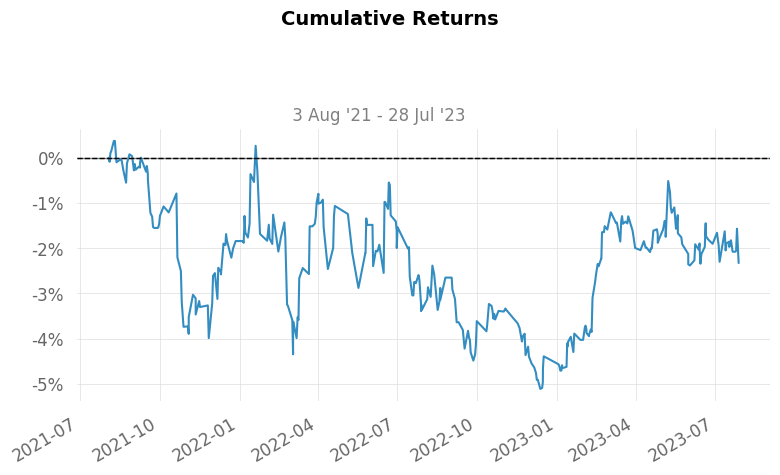

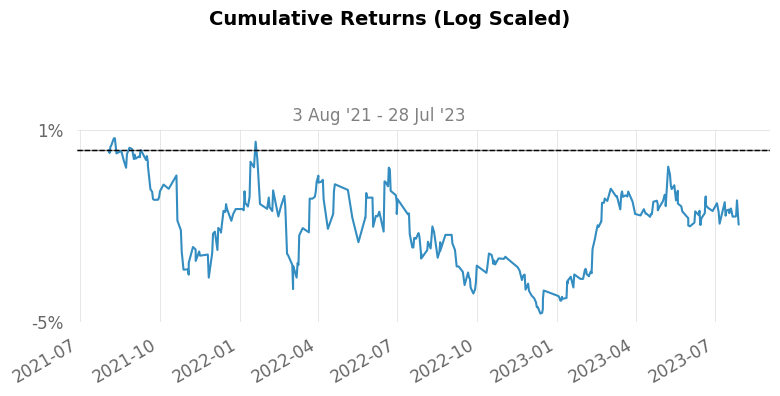

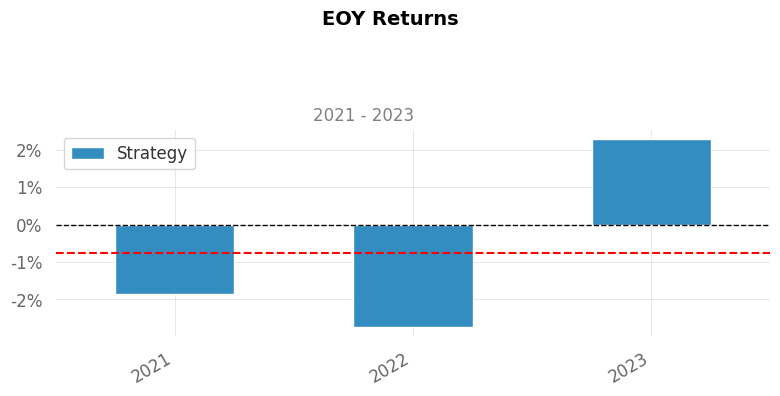

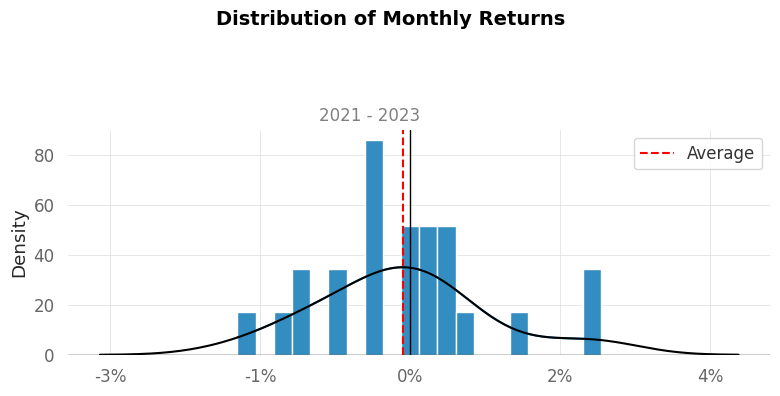

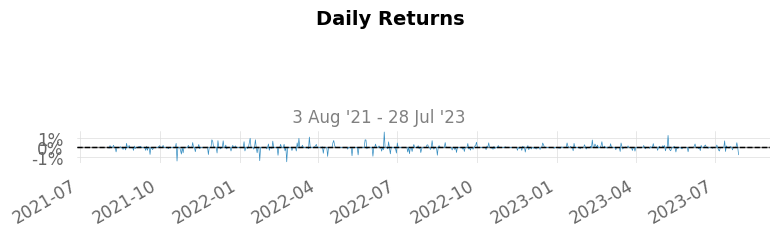

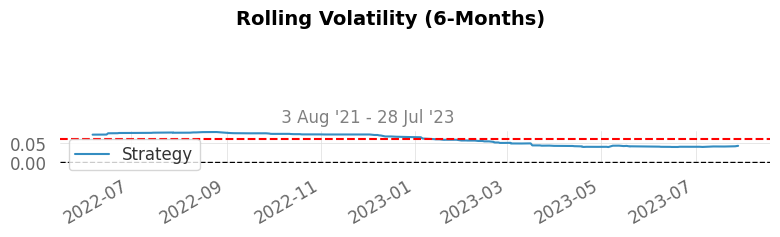

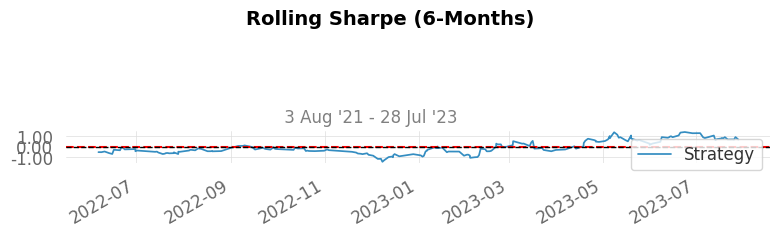

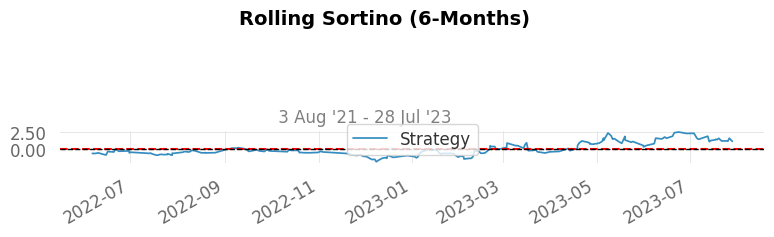

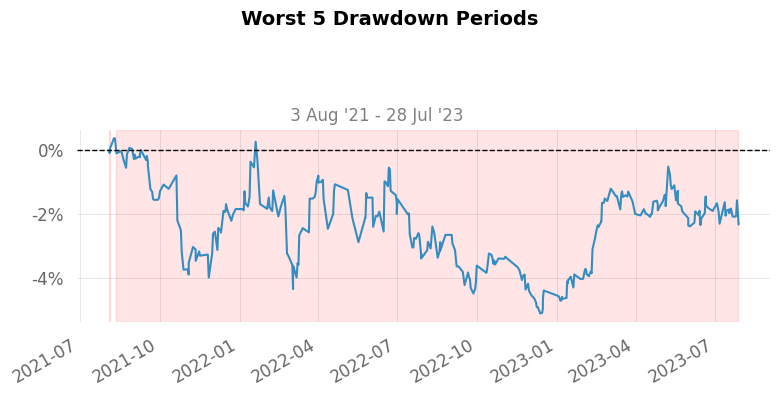

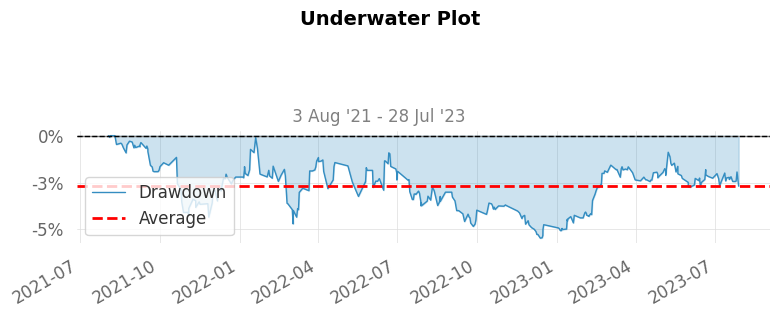

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


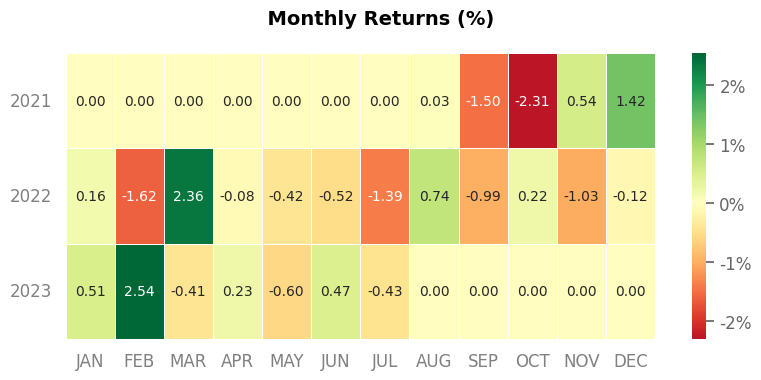

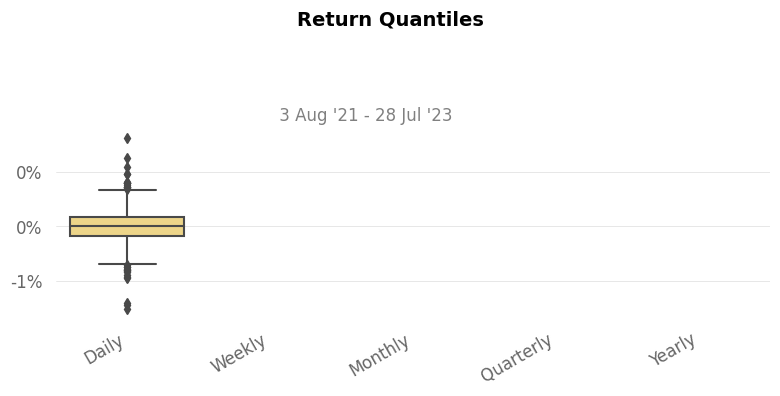

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True )

### Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | c8fc1750c4f64b8ca1ba1cc7cd478cf4 |
| Transaction Type | SELL                             |
| Instrument       | NSE:TATAMOTORS                   |
| Quantity         | 5                                |
| Price            | ₹635.4                           |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2024-01-13T17:46:00.330862Z | COMPLETE               |
| 2024-01-13T17:46:00.330846Z | OPEN                   |
| 2024-01-13T17:46:00.330829Z | OPEN PENDING           |
| 2024-01-13T17:46:00.330809Z | VALIDATION PENDING     |
| 2024-01-13T17:46:00.330760Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 2119e7217f3d4cca9

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---